In [4]:
import pandas as pd
import pylab as plt

symbol=['600104.XSHG'，'600518.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data['close']
    data = pd.DataFrame(data_dict)

    all_gust_spd_mean_list = [data]
    all_gust_agl_dev_list = [data]
g_s_m = pd.Series(all_gust_spd_mean_list)

g_a_d = pd.Series(all_gust_agl_dev_list)
 
corr_gust = round(g_s_m.corr(g_a_d), 4) #计算标准差，round(a, 4)是保留a的前四位小数
 
print('corr_gust :', corr_gust)print('corr_gust :', corr_gust)

SyntaxError: invalid character in identifier (<ipython-input-4-801b858ac84c>, line 4)

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts

stock = ts.get_k_data('600104', start='2017-01-01', end='2017-12-31', 
                      ktype='D', autype='qfq')

stock.index = pd.to_datetime(stock['date'], format='%Y-%m-%d')
stock.pop('date')
# stock = pd.DataFrame(stock, dtype=np.float64)

returns = stock.close.pct_change()[1:] 
r = returns.dropna()
var = r.var()
print('var', var)

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts

stock = ts.get_k_data('600518', start='2017-01-01', end='2017-12-31', 
                      ktype='D', autype='qfq')

stock.index = pd.to_datetime(stock['date'], format='%Y-%m-%d')
stock.pop('date')
# stock = pd.DataFrame(stock, dtype=np.float64)

returns = stock.close.pct_change()[1:] 
r = returns.dropna()
var = r.var()
print('var', var)

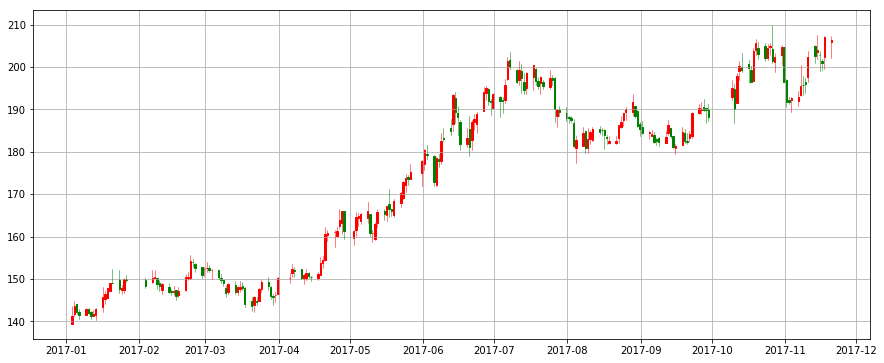

In [5]:
import warnings

warnings.filterwarnings('ignore')
import talib as ta
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

stock1 = pd.read_excel('sz50.xlsx', sheetname='600104.XSHG', index_col='datetime')[:]
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num

stock1['time'] = list(map(date2num, stock1.index))
candle = stock1.reindex_axis(["time", "open", "high", "low", "close"], 1).values

import matplotlib.finance as mpf

fig, (ax) = plt.subplots(1,1, figsize=(15,12))
fig.subplots_adjust(bottom=0.5)
ax.grid(True)
mpf.candlestick_ohlc(ax, candle, width=0.6, colorup='r', colordown='g',alpha=1.0)
ax.xaxis_date ()
plt.show()

In [ ]:
import tushare as ts
from statsmodels.stats.stattools import jarque_bera

data = ts.get_k_data('601857', start='2017-01-01', end='2017-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')
data['percentage']=data['close'].pct_change()

returns = data['percentage'][1:]
_, pvalue, _, _ = jarque_bera(returns)
if pvalue > 0.05:
    print ('判断样本分布服从正态分布')
else:
    print ('判断样本分布不服从正态分布')

In [6]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts

stock = ts.get_k_data('601857', start='2017-01-01', end='2017-12-31', 
                      ktype='D', autype='qfq')

stock.index = pd.to_datetime(stock['date'], format='%Y-%m-%d')
stock.pop('date')
# stock = pd.DataFrame(stock, dtype=np.float64)

returns = stock.close.pct_change()[1:] 
r = returns.dropna()
mean = r.mean()
print('mean', mean)

ModuleNotFoundError: No module named 'tushare'

In [9]:
import pandas as pd

symbol=['601901.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data['close']
    data = pd.DataFrame(data_dict)
a = 2/7
Prices = list(range(10)) #prices
def ema ( N , Price) :
    if N < 1:
        return Price[0]
    return (1-a)*ema(N-1,Price) + a*Price[N]
recursion_df = pd.DataFrame({'test': Prices})
recursion_result = recursion_df.ewm(alpha=2/7, adjust=False).mean()
print(recursion_result)

       test
0  0.000000
1  0.285714
2  0.775510
3  1.411079
4  2.150771
5  2.964836
6  3.832026
7  4.737161
8  5.669401
9  6.621001


In [8]:
import talib as ta
import numpy as np

symbol=['601901.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data['close']
    data = pd.DataFrame(data_dict)
a = 2/7
Prices = list(range(10)) #prices
def ema ( N , Price) :
    if N < 1:
        return Price[0]
    return (1-a)*ema(N-1,Price) + a*Price[N]
EMA = pd.Series(ta.EMA(np.array(Prices, dtype=np.float64),10))
print(EMA)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    4.5
dtype: float64
